Title: Understanding Regression Metrics

Task 1: Calculate MAE and MSE on test predictions and compare errors.

In [ ]:

import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error


X, y = make_regression(n_samples=100, n_features=20, noise=10, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Fit models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate MAE and MSE for each model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Print the errors
print(f"Linear Regression - MAE: {mae_linear}, MSE: {mse_linear}")
print(f"Ridge Regression - MAE: {mae_ridge}, MSE: {mse_ridge}")
print(f"Lasso Regression - MAE: {mae_lasso}, MSE: {mse_lasso}")


Linear Regression - MAE: 9.534896147431663, MSE: 151.23885760465558
Ridge Regression - MAE: 9.973091466284599, MSE: 159.0049487860993
Lasso Regression - MAE: 9.577095525524786, MSE: 150.48104445676228


Task 2: Evaluate R2 Score on varying datasets and discuss significance.

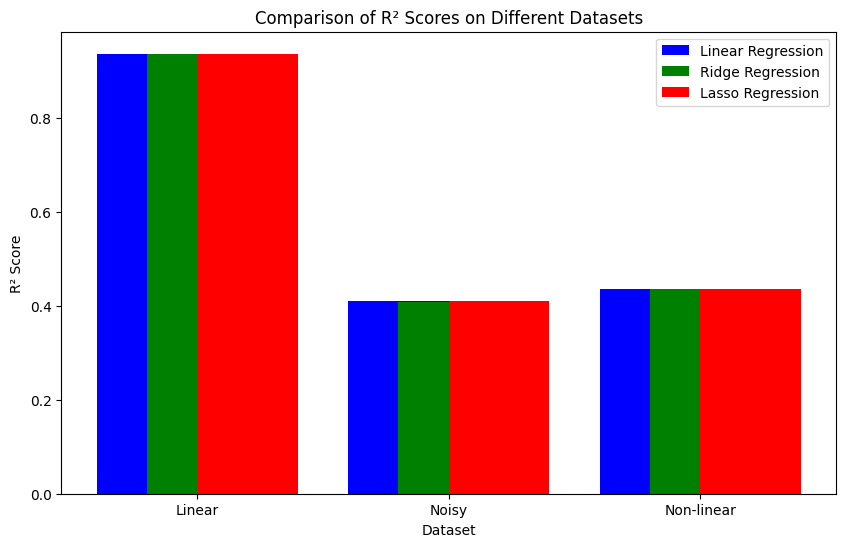

Linear Dataset:
Linear Regression R²: 0.9374151607623286
Ridge Regression R²: 0.9364639057612545
Lasso Regression R²: 0.9372730612420453
----------------------------------------
Noisy Dataset:
Linear Regression R²: 0.4105935380273765
Ridge Regression R²: 0.40877471942439825
Lasso Regression R²: 0.4103369094058722
----------------------------------------
Non-linear Dataset:
Linear Regression R²: 0.4370695824595424
Ridge Regression R²: 0.436779720296005
Lasso Regression R²: 0.43663212877957613
----------------------------------------


In [2]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import r2_score

# Generate synthetic datasets
# 1. Linear dataset
X_linear, y_linear = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# 2. Noisy dataset
X_noisy, y_noisy = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)

# 3. Non-linear dataset (polynomial features)
X_poly = np.random.uniform(-3, 3, size=(100, 1))
y_poly = X_poly**3 + np.random.normal(0, 10, size=(100, 1))

# Train-test split for all datasets
datasets = [(X_linear, y_linear), (X_noisy, y_noisy), (X_poly, y_poly)]
datasets_names = ['Linear', 'Noisy', 'Non-linear']

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Store R² scores
r2_scores_linear = []
r2_scores_ridge = []
r2_scores_lasso = []

# Evaluate models on different datasets
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit models
    linear_model.fit(X_train, y_train)
    ridge_model.fit(X_train, y_train)
    lasso_model.fit(X_train, y_train)

    # Predict and calculate R² scores
    r2_linear = r2_score(y_test, linear_model.predict(X_test))
    r2_ridge = r2_score(y_test, ridge_model.predict(X_test))
    r2_lasso = r2_score(y_test, lasso_model.predict(X_test))

    r2_scores_linear.append(r2_linear)
    r2_scores_ridge.append(r2_ridge)
    r2_scores_lasso.append(r2_lasso)

# Plot R² scores for all models and datasets
x = np.arange(len(datasets))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, r2_scores_linear, 0.4, label='Linear Regression', color='blue')
plt.bar(x, r2_scores_ridge, 0.4, label='Ridge Regression', color='green')
plt.bar(x + 0.2, r2_scores_lasso, 0.4, label='Lasso Regression', color='red')

plt.xticks(x, datasets_names)
plt.xlabel('Dataset')
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores on Different Datasets')
plt.legend()
plt.show()

# Output R² scores for each model and dataset
for i, name in enumerate(datasets_names):
    print(f"{name} Dataset:")
    print(f"Linear Regression R²: {r2_scores_linear[i]}")
    print(f"Ridge Regression R²: {r2_scores_ridge[i]}")
    print(f"Lasso Regression R²: {r2_scores_lasso[i]}")
    print('-' * 40)


Task 3: Use a sample dataset, compute all three metrics, and deduce model performance.

Mean Absolute Error (MAE): 8.416659922209051
Mean Squared Error (MSE): 104.20222653187027
R² Score: 0.9374151607623286


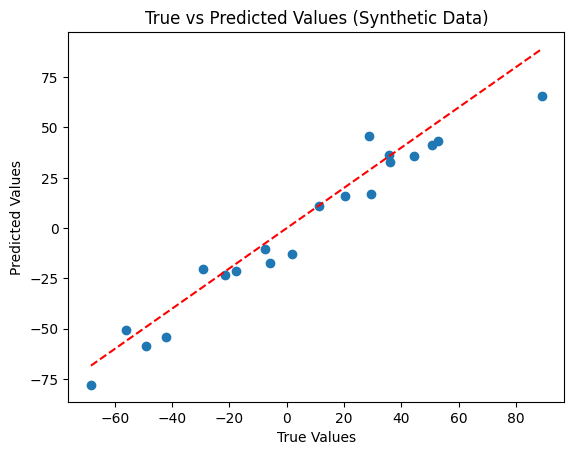

In [4]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Visualize the true vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Synthetic Data)')
plt.show()
